Python for Data & Analytics - 2nd Edition<br>
Chapter 16, sections 5 and 6

*** requires datafiles: ORNG.csv, USIX.csv

In [1]:
import pandas as pd
stockSymbol = 'ORNG'
stock = pd.read_csv(stockSymbol +'.csv', index_col=0)
stock.head()

,Open,High,Low,Close,AdjustedClose,Volume
Date,,,,,,
2017-01-03,57.900,58.165,57.380,58.075,54.595,230255200
2017-01-04,57.925,58.255,57.875,58.010,54.534,168944800
2017-01-05,57.960,58.430,57.905,58.305,54.812,177548800
2017-01-06,58.390,59.080,58.235,58.955,55.423,254015200
2017-01-09,58.975,59.715,58.970,59.495,55.930,268495200


In [2]:
stock.tail(1)

,Open,High,Low,Close,AdjustedClose,Volume
Date,,,,,,
2021-12-30,358.94,361.14,356.18,356.4,355.947,119546000


In [3]:
stock = stock[['AdjustedClose']].copy()
stock.rename(columns={'AdjustedClose':stockSymbol}, inplace=True)
stock.head()

,ORNG
Date,
2017-01-03,54.595
2017-01-04,54.534
2017-01-05,54.812
2017-01-06,55.423
2017-01-09,55.930


In [4]:
stock[stockSymbol + '_Return'] = stock.pct_change()
stock.head()

,ORNG,ORNG_Return
Date,,
2017-01-03,54.595,NaN
2017-01-04,54.534,-0.001117
2017-01-05,54.812,0.005098
2017-01-06,55.423,0.011147
2017-01-09,55.930,0.009148


In [5]:
indexSymbol = 'USIX'
index = pd.read_csv(indexSymbol +'.csv', index_col=0)
index = index[['AdjustedClose']].copy()
index.rename(columns={'AdjustedClose':indexSymbol}, inplace=True)
index[indexSymbol +'_Return'] = index.pct_change()
index.head()

,USIX,USIX_Return
Date,,
2017-01-03,412.295,NaN
2017-01-04,414.748,0.005950
2017-01-05,414.418,-0.000796
2017-01-06,415.901,0.003579
2017-01-09,414.528,-0.003301


In [6]:
df = index.join(stock)
df.head()

,USIX,USIX_Return,ORNG,ORNG_Return
Date,,,,
2017-01-03,412.295,NaN,54.595,NaN
2017-01-04,414.748,0.005950,54.534,-0.001117
2017-01-05,414.418,-0.000796,54.812,0.005098
2017-01-06,415.901,0.003579,55.423,0.011147
2017-01-09,414.528,-0.003301,55.930,0.009148


<Axes: xlabel='Date'>

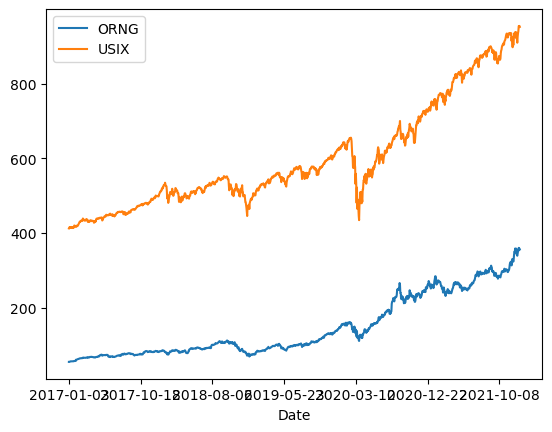

In [7]:
df[[stockSymbol,indexSymbol]].plot()

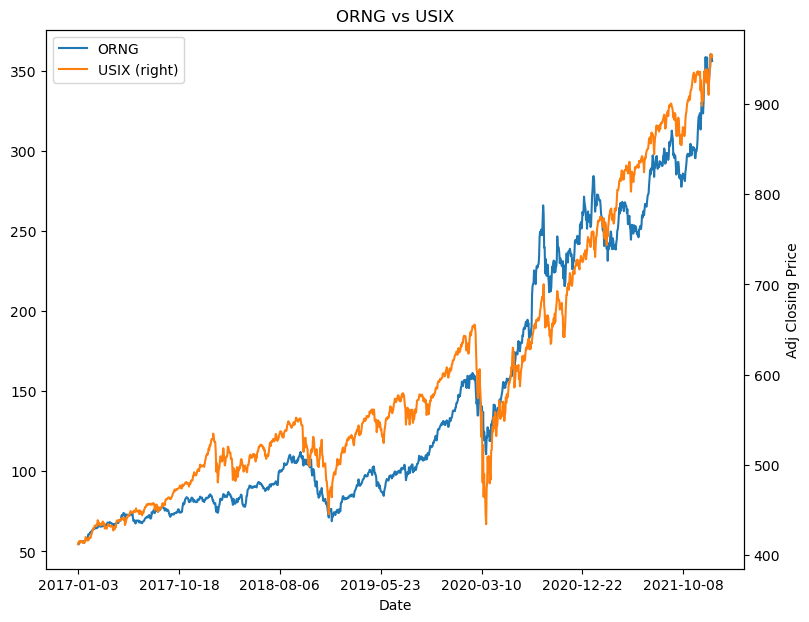

In [8]:
import matplotlib.pyplot as plt
df[[stockSymbol, indexSymbol]].plot(secondary_y=indexSymbol, figsize=(9,7))
plt.title(stockSymbol+' vs '+indexSymbol)
plt.ylabel('Adj Closing Price')
plt.show()

<Axes: ylabel='Frequency'>

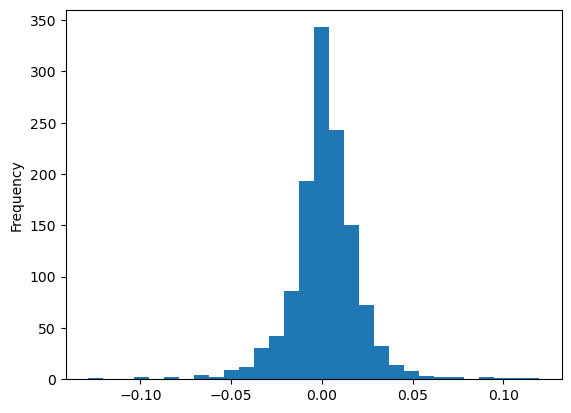

In [9]:
df[stockSymbol+'_Return'].plot(kind='hist', bins=30)

<Axes: ylabel='Density'>

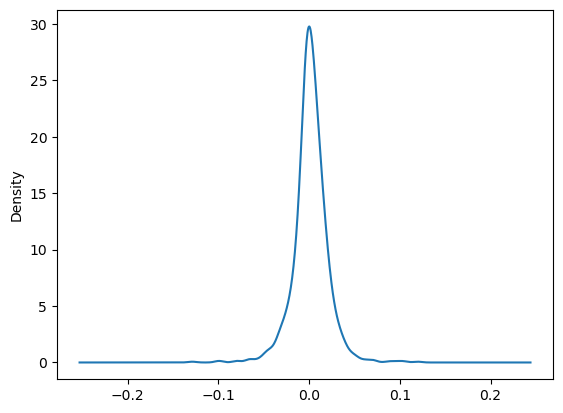

In [10]:
df[stockSymbol+'_Return'].plot(kind='kde')

<Axes: >

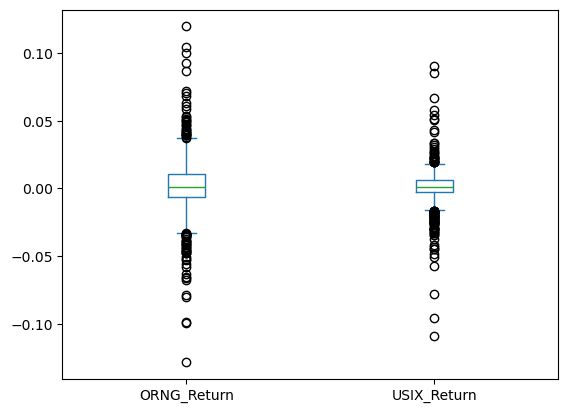

In [11]:
df[[stockSymbol+'_Return',indexSymbol+'_Return']].plot(kind='box')

<Axes: xlabel='USIX_Return', ylabel='ORNG_Return'>

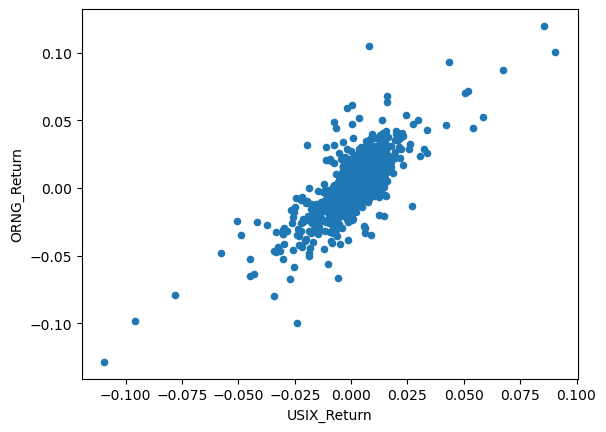

In [12]:
df.plot(kind='scatter', x=indexSymbol+'_Return', y=stockSymbol+'_Return')

Code from: Python for Data & Analytics, (c) 2025 Rose River Software, LLC